In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# conda install scikit-image
from skimage import filters

ret= 50.0


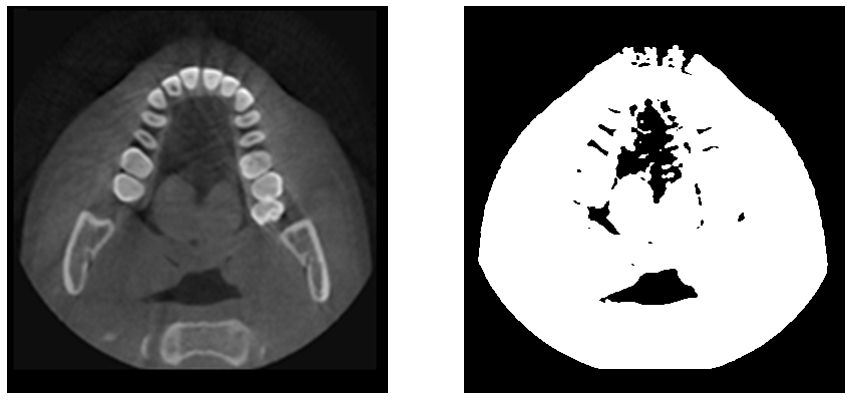

In [2]:
src = cv2.imread('./data/mandible.png', cv2.IMREAD_GRAYSCALE)
ret, dst = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('ret=', ret)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(src, cmap='gray')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(dst, cmap='gray')

ret2= 110.0


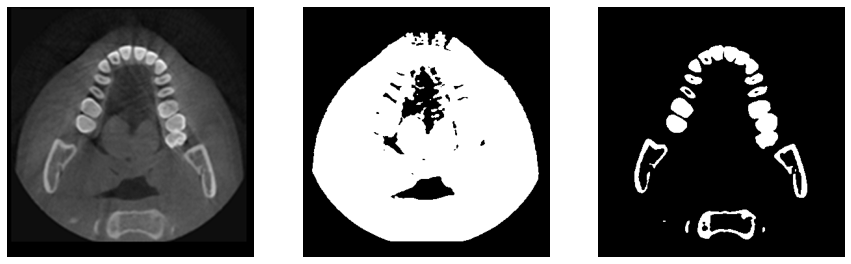

In [3]:
thresh = filters.threshold_multiotsu(src, classes=3)
ret2, dst2 = cv2.threshold(src, thresh[1], 255, cv2.THRESH_BINARY)
print('ret2=', ret2)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(src, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(dst, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(dst2, cmap='gray')

threshold= 149.0


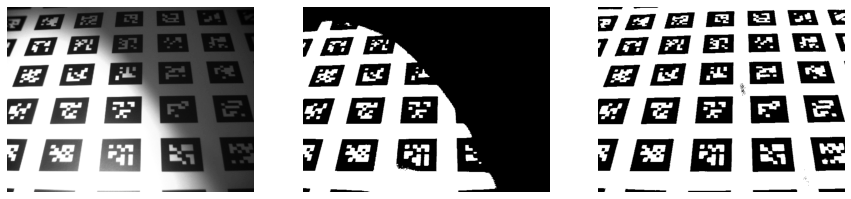

In [4]:
src2 = cv2.imread('./data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)
ret3, dst3 = cv2.threshold(src2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('threshold=', ret3)

dst4 = cv2.adaptiveThreshold(src2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                             cv2.THRESH_BINARY, 51, 7)
#dst6 = cv2.adaptiveThreshold(src2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 7)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(src2, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(dst3, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(dst4, cmap='gray')

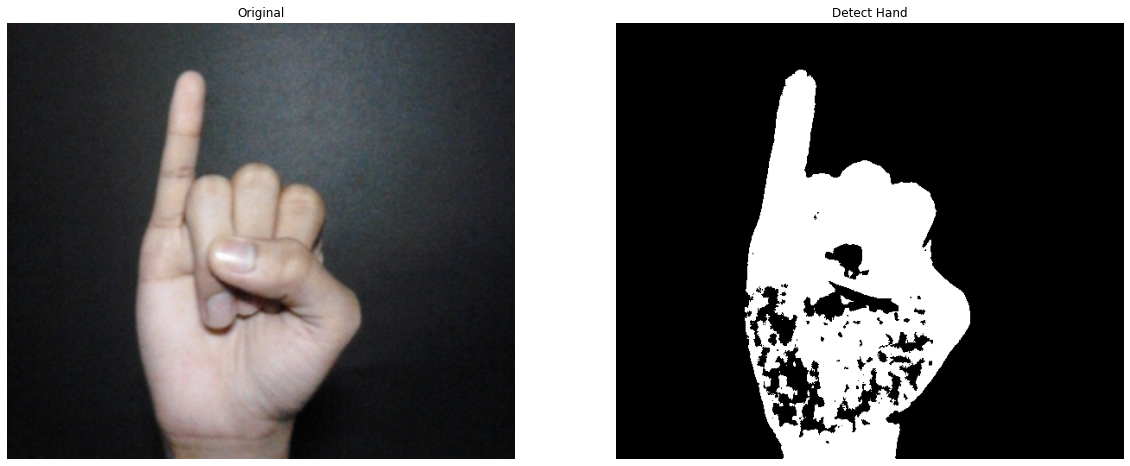

In [8]:
src = cv2.imread('./data/hand.png')
hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
lower = np.array([0, 10, 80], dtype = "uint8")
upper = np.array([30, 255, 255], dtype = "uint8")
dst = cv2.inRange(hsv,lower,upper)

src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
imgae1=plt.subplot(1,2,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('Detect Hand')
plt.axis('off')
plt.imshow(dst, cmap="gray")


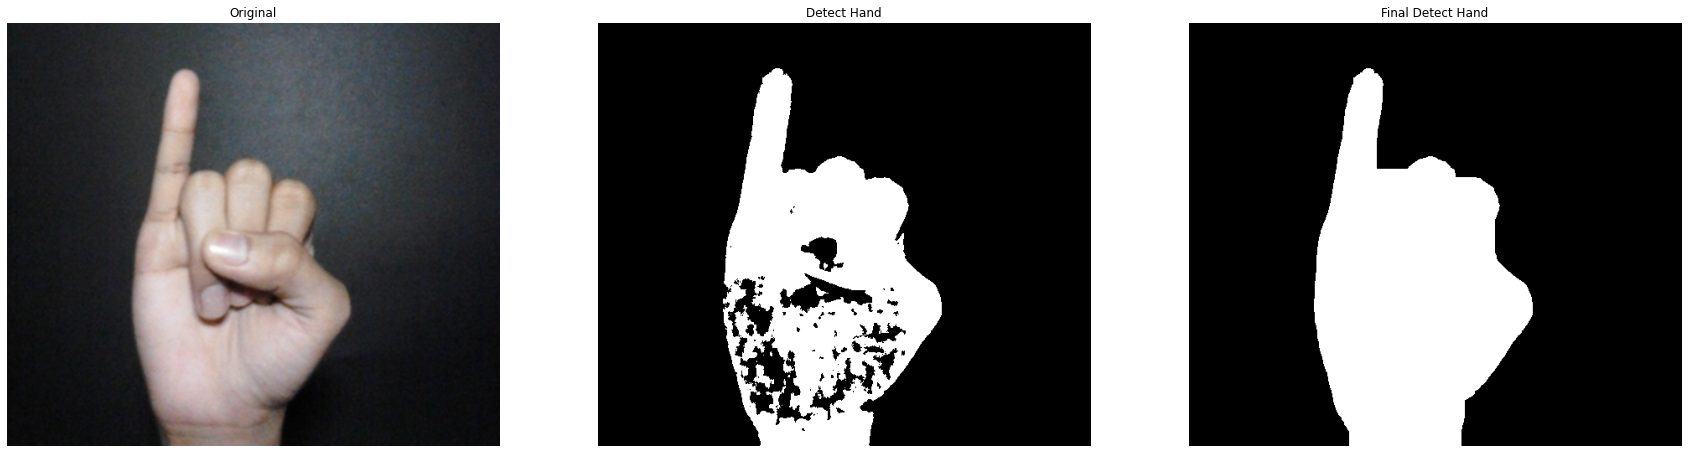

In [10]:
kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(7, 7))
#erode = cv2.erode(src,kernel,iterations = 3)
#dilate = cv2.dilate(src,kernel,iterations = 3)
mor_close = cv2.morphologyEx(dst, cv2.MORPH_CLOSE, kernel,iterations = 5)
#밖에 노이즈가 없고, 안에 hole이 많아 close 사용.

plt.figure(figsize=(30, 30))
imgae1=plt.subplot(1, 3, 1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(src)

imgae2=plt.subplot(1, 3, 2)
imgae2.set_title('Detect Hand')
plt.axis('off')
plt.imshow(dst, cmap="gray")

imgae2=plt.subplot(1, 3, 3)
imgae2.set_title('Final Detect Hand')
plt.axis('off')
plt.imshow(mor_close, cmap="gray")

In [11]:
def onChange(pos): # 트랙바 핸들러
    global img, mask, hsv
    l = cv2.getTrackbarPos('V-lower', 'img')
    u = cv2.getTrackbarPos('V-upper', 'img')   
    lower = np.array([0, 0, l], dtype = "uint8")
    upper = np.array([255, 255, u], dtype = "uint8")
    mask = cv2.inRange(hsv,lower,upper)    
    cv2.imshow('mask',mask)

In [12]:
img = cv2.imread('./data/candies.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = np.zeros_like(img, dtype=np.uint8) # black
cv2.imshow('img',img)
cv2.imshow('mask',mask)

# 트랙바 생성
cv2.createTrackbar('V-lower', 'img', 0, 255, onChange)
cv2.createTrackbar('V-upper', 'img', 0, 255, onChange)

# 트랙바 위치 초기화
cv2.setTrackbarPos('V-lower', 'img', 0)
cv2.setTrackbarPos('V-upper', 'img', 0)

cv2.waitKey()
cv2.destroyAllWindows()